In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy

calls    = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs  = pd.read_csv('/datasets/tariffs.csv')
users    = pd.read_csv('/datasets/users.csv')

In [40]:
calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
101862,1262_219,2018-11-05,1.77,1262
28914,1072_240,2018-03-05,10.53,1072
193443,1475_112,2018-03-04,10.06,1475
118745,1307_219,2018-09-28,3.03,1307
78788,1196_1020,2018-08-19,8.05,1196
56165,1143_229,2018-08-31,7.15,1143
16135,1044_241,2018-07-26,8.73,1044
188432,1465_149,2018-07-30,4.29,1465
8144,1021_612,2018-05-05,0.00,1021
129009,1330_873,2018-10-21,0.00,1330


   **Calls.**   
   Приступим к изменению в базе звонков  
   1. Округлим звонки вверх
   2. Добавим столбец "месяц"

In [41]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls['month']    = pd.DatetimeIndex(calls['call_date']).month

Согласен. Но в реальном бизнесе мы можем задать вопрос заказчику и, дописав код, исправить ситуацию. )) 

In [42]:
internet.info()
internet.sample(10)
#Переведем мегабайты в гигабайты
internet['gb_used'] = internet['mb_used'] / 1024

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [43]:
messages.info()
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
53848,1238_261,2018-12-04,1238
14577,1064_264,2018-12-05,1064
94184,1385_893,2018-07-20,1385
81483,1341_337,2018-08-09,1341
35481,1151_31,2018-11-25,1151
56159,1249_93,2018-10-01,1249
55131,1244_297,2018-06-06,1244
42405,1183_48,2018-10-21,1183
27312,1115_3,2018-11-03,1115
112932,1455_21,2018-05-26,1455


**Internet and Messages**  
Добавим столбец "месяц". Остальное пока менять не нужно.

In [44]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [45]:
users.info()
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
249,1249,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart
106,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra
170,1170,69,NaN,Новосибирск,Вадим,Козлов,2018-12-20,smart
223,1223,20,NaN,Стерлитамак,Алан,Панфилов,2018-12-12,smart
294,1294,66,NaN,Владивосток,Дебора,Асафьева,2018-02-20,ultra
308,1308,52,NaN,Москва,Инесса,Корнилова,2018-01-04,smart
75,1075,25,NaN,Екатеринбург,Рафаэль,Никулин,2018-11-02,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
86,1086,73,NaN,Волгоград,Ириней,Аксёнов,2018-04-26,smart
366,1366,43,NaN,Санкт-Петербург,Василиса,Фетисова,2018-06-14,smart


**Users**  
Добавим информацию о тарифах в виде значений 0 и 1

In [46]:
tariffs.info()
#Оставим пока как есть

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [47]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff', 'mb_per_month_included': 'mb_per_month_included'})

Приведем даты к Datetime везде

In [48]:
calls['call_date']        = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date']   = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['churn_date']       = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date']         = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [49]:
costs = pd.DataFrame()
calls_month = calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [50]:
tmp_df = pd.DataFrame(calls_month.to_records())
costs['user_id'] = tmp_df['user_id']
costs['month']   = tmp_df['month']
costs['calls']   = tmp_df.iloc[:, 2]
costs['minutes'] = tmp_df.iloc[:, 3]

**Количество отправленных сообщений по месяцам**

In [51]:
messages_month = messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)
tmp_df = pd.DataFrame(messages_month.to_records()).rename(columns={'id': 'messages'})

In [52]:
costs = costs.merge(tmp_df, on=['user_id', 'month'], how='outer')

**Объем израсходованного интернет-трафика по месяцам**

In [53]:
internet_month = internet.pivot_table(
    index=['month', 'user_id'],
    values='gb_used',
    aggfunc='sum'
)

tmp_df = pd.DataFrame(internet_month.to_records())

In [54]:
costs = costs.merge(tmp_df, on=['user_id', 'month'], how='outer')
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3174 non-null float64
minutes     3174 non-null float64
messages    2717 non-null float64
gb_used     3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Мы получили в одном датафрейме следующую информацию по пользователям:

- количество сделанных звонков и израсходованных минут разговора;
- количество отправленных сообщений;
- объем израсходованного интернет-трафика в мегабайтах.  

После формирования датафрейма появились пропуски по месяцам. Получается, что некоторые пользователи в некоторые месяцы пользовались не всеми услугами. Например, кто-то только мобильным интернетом, а кто-то звонками. Заполним пропуски нулями и позже посмотрим на распределение.

In [115]:
nan_features = ['calls', 'minutes', 'messages']

for f in nan_features:
    costs[f] = costs[f].fillna(0).astype('int')

costs['gb_used'] = costs['gb_used'].fillna(0)

In [56]:
costs.sample(5)

,user_id,month,calls,minutes,messages,gb_used
110,1429,2,37,240,0,21.783984
2088,1295,10,28,156,108,19.263770
2830,1135,12,54,359,24,18.001260
841,1472,6,82,606,62,23.302490
4,1071,1,24,194,16,15.238613


Добавим информацию о пользователях и тарифах

In [57]:
costs = costs.merge(users, on='user_id', how='left')

In [58]:
costs = costs.merge(tariffs, on='tariff', how='left')

Переименуем столбцы для удобства.

In [59]:
costs = costs.rename(columns={'minutes_included_y': 'minutes_included',
                              'messages_included_y': 'messages_included',
                              'mb_per_month_included_y':'mb_per_month_included',
                              'rub_monthly_fee_y':'rub_monthly_fee',
                              'rub_per_gb_y':'rub_per_gb', 'rub_per_message_y':'rub_per_message',
                              'rub_per_minute_y':'rub_per_minute'}
                    )

Перерасход минут, сообщений и трафика посчитаем как разность между месячным значением и включенным в тариф.

In [60]:
costs['minutes_over']  = costs['minutes'] - costs['minutes_included']
costs['messages_over'] = costs['messages'] - costs['messages_included']
costs['gb_used_over']  = costs['gb_used'] - (costs['mb_per_month_included']/1024)
costs['gb_used_over'] = costs['gb_used_over'].apply(np.ceil)

In [61]:
costs.sample(5)

,user_id,month,calls,minutes,messages,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,gb_used_over
663,1099,6,93,683,38,17.241641,67,NaT,Тольятти,Аюна,...,1000,30720,3000,1950,150,1,1,-2317,-962,-12.0
2518,1294,11,34,267,26,23.974639,66,NaT,Владивосток,Дебора,...,1000,30720,3000,1950,150,1,1,-2733,-974,-6.0
2226,1456,10,127,889,0,21.742441,40,NaT,Санкт-Петербург,Мануэла,...,50,15360,500,550,200,3,3,389,-50,7.0
798,1382,6,98,681,74,7.660576,42,NaT,Самара,Оксана,...,1000,30720,3000,1950,150,1,1,-2319,-926,-22.0
2868,1174,12,93,603,58,18.552402,29,NaT,Санкт-Петербург,Лолита,...,50,15360,500,550,200,3,3,103,8,4.0


Перерасход - положительный, остаток - отрицательный.

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика,
остаток умножим на значение из тарифного плана.

In [62]:
def calc_monthly_revenue(row):
    minutes_price = 0
    messages_price = 0
    gb_used_price = 0
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']
    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']
    if row['gb_used_over'] > 0:
        gb_used_price = row['gb_used_over'] * row['rub_per_gb']
    return minutes_price + messages_price + gb_used_price

In [63]:
costs['rub_monthly_over'] = costs.apply(calc_monthly_revenue, axis=1)
costs['rub_monthly_total'] = costs['rub_monthly_fee'] + costs['rub_monthly_over']

Оставим только то, что нужно нам.

In [64]:
costs = pd.DataFrame(
    costs[['month', 'tariff', 'user_id', 'city',
           'calls', 'minutes', 'messages', 'gb_used',
           'minutes_over', 'messages_over', 'gb_used_over',
           'rub_monthly_over', 'rub_monthly_total']]
)

Посчитаем сколько пользователей тарифов "Смарт" и "Ультра" у нас есть

In [65]:
smart_costs = costs.query("tariff == 'smart'")
len(smart_costs.groupby('user_id'))

350

In [66]:
ultra_costs = costs.query("tariff == 'ultra'")
len(ultra_costs.groupby('user_id'))

148

В таблице 350 пользователей "Смарт" и пользователей 148 "Ультра"

**Анализ данных**

Сделаем сводную таблицу по месяцам

In [67]:
values = ['minutes', 'messages', 'gb_used', 'rub_monthly_over', 'rub_monthly_total']
tariff_costs = costs.pivot_table(
    index=['tariff', 'month'],
    values=values
)
smart_month_costs = tariff_costs.loc['smart']
ultra_month_costs = tariff_costs.loc['ultra']

In [68]:
smart_month_costs

,gb_used,messages,minutes,rub_monthly_over,rub_monthly_total
month,,,,,
1,8.314177,18.235294,203.852941,171.323529,721.323529
2,11.325248,24.086207,298.689655,277.603448,827.603448
3,14.750155,31.857143,390.051948,614.623377,1164.623377
4,13.146661,30.741071,367.133929,413.089286,963.089286
5,15.434750,33.773050,387.361702,647.510638,1197.510638
6,15.424461,33.402439,395.640244,654.018293,1204.018293
7,15.374170,33.751244,408.353234,673.950249,1223.950249
8,16.290729,33.638298,421.468085,770.595745,1320.595745
9,15.921464,33.638462,428.611538,699.946154,1249.946154


In [69]:
ultra_month_costs

,gb_used,messages,minutes,rub_monthly_over,rub_monthly_total
month,,,,,
1,12.832696,33.777778,428.111111,0.000000,1950.000000
2,12.545388,21.958333,297.125000,25.000000,1975.000000
3,17.124561,32.297297,489.648649,64.864865,2014.864865
4,16.433725,31.563636,458.018182,51.818182,2001.818182
5,19.195834,37.850746,510.328358,109.701493,2059.701493
6,18.704053,41.726190,479.702381,89.285714,2039.285714
7,20.237690,49.846154,545.791209,168.131868,2118.131868
8,19.297592,48.439252,510.775701,133.177570,2083.177570
9,18.918687,52.286957,539.443478,74.347826,2024.347826


**Минуты разговора, количество сообщений и объём интернет-трафика в среднем необходимые пользователям каждого тарифа в месяц**

In [70]:
tariff_usage = tariff_costs.pivot_table(
    index='tariff',
    values=values
)
tariff_usage

,gb_used,messages,minutes,rub_monthly_over,rub_monthly_total
tariff,,,,,
smart,14.711252,31.413211,386.760499,629.924424,1179.924424
ultra,17.994264,43.714983,495.934310,96.932856,2046.932856


**Вывод** :
- Пользователи тарифа Ультра более активны, но пользователи тарифа Смарт тратят в среднем в 6 раз больше на дополнительные пакеты услуг. Оператор может использовать это для маркетинговой компании.
- Оператору больше денег приносит тариф Ультра, даже с учетом того, что в среднем пользователи не выходят за границы тарифных лимитов, а пользователи тарифа Смарт не тратят столько денег, чтобы перегнать стоимость тарифа Ультра.   
**Таким образом, для пользователя выгоднее тариф Смарт.**

**Посмотрим ситуацию по городам**

In [71]:
moscow = costs['city'] == 'Москва'
costs['city'].where(moscow, 'Другой регион', inplace=True)

city_costs = costs.pivot_table(
    index=['city', 'month'],
    values=values
)

city_use = city_costs.pivot_table(
    index='city',
    values=values
)
city_use

,gb_used,messages,minutes,rub_monthly_over,rub_monthly_total
city,,,,,
Другой регион,15.365499,35.268458,413.245425,477.922075,1424.462123
Москва,17.166180,33.944639,444.005793,416.459916,1511.425186


По средним значениям выручки пользователей Москвы и регионов получается, что разница не велика. Пользователи примерно отправляют одинаковое количество смс и звонят так же примерно одинаково. В Москве чуть больше потребляют трафика, но не намного.

**Дисперсия и стандартное отклонение**

**Звонки**

In [72]:
smart_costs['minutes'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: minutes, dtype: float64

In [73]:
ultra_costs['minutes'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: minutes, dtype: float64

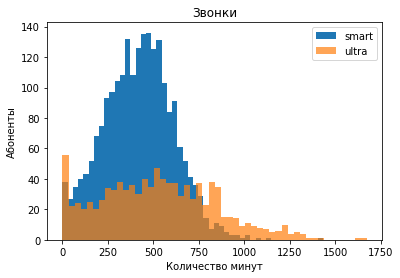

In [109]:
fig, ax = plt.subplots()
plt.hist(smart_costs['minutes'], bins=50, label='smart')
plt.hist(ultra_costs['minutes'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Звонки')
ax.set_xlabel('Количество минут')
ax.set_ylabel('Абоненты')
plt.show()

Дисперсия по звонкам

In [75]:
smart_minutes_var = np.var(smart_costs['minutes'], ddof=1)
ultra_minutes_var = np.var(ultra_costs['minutes'], ddof=1)

In [76]:
smart_minutes_var

36219.31578434428

In [77]:
ultra_minutes_var

100873.63339730098

Стандартное отклонение

In [78]:
smart_call_std = math.sqrt(smart_minutes_var)
smart_call_std

190.31372988921288

In [79]:
ultra_call_std = math.sqrt(ultra_minutes_var)
ultra_call_std

317.6060978591264

В тарифе "Смарт" при среднем количестве звонков 417 минут, разброс бывает в пределах 190 минут. Т.е. пользователи часто превышают включенный пакет минут. 
В тарифе "Ультра" ситуация лучше. Включенного пакета хватает всем пользователям.

P.s. выбросы имеют место, но они не влияют на общую картину.

**Сообщения**

In [80]:
smart_costs['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [81]:
ultra_costs['messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

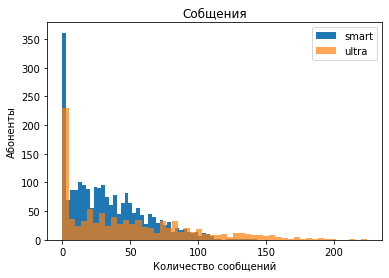

In [111]:
fig, ax = plt.subplots()
plt.hist(smart_costs['messages'], bins=50, label='smart')
plt.hist(ultra_costs['messages'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Собщения')
ax.set_xlabel('Количество сообщений')
ax.set_ylabel('Абоненты')
plt.show()

Дисперсия по сообщениям

In [83]:
smart_messages_var = np.var(smart_costs['messages'], ddof=1)
ultra_messages_var = np.var(ultra_costs['messages'], ddof=1)

In [84]:
smart_messages_var

796.8129584480083

In [85]:
ultra_messages_var

2285.266142544674

Стандартное отклонение

In [86]:
smart_messages_std = math.sqrt(smart_messages_var)
smart_messages_std

28.22787555676141

In [87]:
ultra_messages_std = math.sqrt(ultra_messages_var)
ultra_messages_std

47.80445735017472

По сообщениям ситуация более спокойная. Сообщений хватает всем пользователям "Ультры" и подавляющему количеству пользователей "Смарт". Может из-за того, что смс-ки не такие популярные, как лет 15 назад?

**Интернет**

In [88]:
smart_costs['gb_used'].describe()

count    2228.000000
mean       15.835607
std         5.724352
min         0.000000
25%        12.352805
50%        16.120840
75%        19.574016
max        37.648877
Name: gb_used, dtype: float64

In [89]:
ultra_costs['gb_used'].describe()

count    975.000000
mean      19.207505
std        9.710010
min        0.000000
25%       11.726860
50%       18.939736
75%       26.266162
max       48.579775
Name: gb_used, dtype: float64

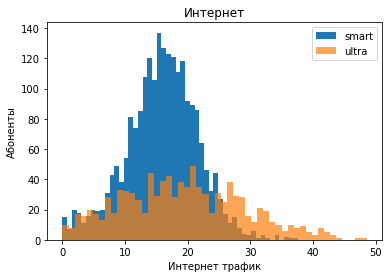

In [112]:
fig, ax = plt.subplots()
plt.hist(smart_costs['gb_used'], bins=50, label='smart')
plt.hist(ultra_costs['gb_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Интернет')
ax.set_xlabel('Интернет трафик')
ax.set_ylabel('Абоненты')
plt.show()

In [91]:
smart_gb_used_var = np.var(smart_costs['gb_used'], ddof=1)
ultra_gb_used_var = np.var(ultra_costs['gb_used'], ddof=1)

In [92]:
smart_gb_used_var

32.76820343235317

In [93]:
ultra_gb_used_var

94.28429503691821

Стандартное отклонение

In [94]:
smart_gb_used_std = math.sqrt(smart_gb_used_var)
smart_gb_used_std

5.724351791456669

In [95]:
ultra_gb_used_std = math.sqrt(ultra_gb_used_var)
ultra_gb_used_std

9.710010043090492

"Смарт" - 15 Гб трафика для поьзователей маловато, только половина пользователей укладывается во включенный пакет. Остальные вынуждены оплачивать дополнительные мегабайты.
"Ультра" - пользователи этого тарифа довольны. Им хватает включенного пакета для своих нужд.

**Проверим гипотезы**

Мы рассматриваем две генеральные сопокупности – пользователей разных тарифов мобильного оператора. Проверим две (двусторонние) гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Чтобы понять, различается ли средняя выручка пользователей разных тарифов и населенных пунктов, значима ли разница между средними значениями, проведем статистические тесты.

**Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

Средняя выручка пользователя тарифа "Смарт": 1127.79 руб
Средняя выручка пользователя тарифа "Ультра": 2038.35 руб

Нулевая гипотеза H₀:  
Средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается

Альтернативная гипотеза H₁:  
Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 1%.

In [96]:
alpha = 0.01

results = st.ttest_ind(
    smart_costs['rub_monthly_total'], 
    ultra_costs['rub_monthly_total'])

print('P-value: {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Средняя выручка по тарифам не одинакова, и нулевая вероятность говорит о том, что случайно получить такое отличие в значениях не получится. Значит, средняя выручка пользователей тарифов "Ультра" и "Смарт" различается и наша гипотеза подтвердилась.

**Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Средняя выручка пользователей Москвы: 1473.66 руб
Средняя выручка пользователей других регионов: 1385.41 руб

Нулевая гипотеза H₀:  
Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Альтернативная гипотеза H₁:  
Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [97]:
alpha = 0.05

moscow = costs.query("city == 'Москва'")['rub_monthly_total']
other_cities = costs.query("city == 'Другой регион'")['rub_monthly_total']

results = st.ttest_ind(moscow, other_cities)

print('P-value: {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Значение P-value говорит о том, что даже если средняя выручка пользователей из Москвы и регионов неодинакова, с вероятностью в 52% такое различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Гипотеза не подтвердилась.

**Вывод**

Из двух наших гипотез подтвердилась только первая:  

**Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается**  

На вопрос "какой тариф лучше?" можем сказать, что 

- для оператора лучше тариф "Ультра"  
- для пользователя лучше тариф "Смарт"

Средняя прибыльность в двух тарифах отличается. Средние израсходованные количество звонков, сообщений и мегабайт интернет трафика не так сильно отличаются между тарифами, тогда как базовая стоимость тарифов отличается почти в 4 раза!

Возможно оператору стоит ввести еще один, промежуточный, тариф. Который позволил бы абонентам более комфортно пользоваться услугами, не выходя за пределы включенных пакетов. И абонентская плата находилась бы между "Смартом" и "Ультрой"